## Setup

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off Future Warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Downloading the data

In [74]:
def download_data(file_path="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"):
    df = pd.read_csv(file_path)
    # Convert the dateRep column to datetime so that we could use it as our index column
    df["dateRep"] = pd.to_datetime(df["dateRep"])
    # Change the index of the dataframe to use the dateRep column. 
    df = df.set_index("dateRep")
    return df

In [75]:
df = download_data()
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 12 columns):
dateRep                                                       43718 non-null datetime64[ns]
day                                                           43718 non-null int64
month                                                         43718 non-null int64
year                                                          43718 non-null int64
cases                                                         43718 non-null int64
deaths                                                        43718 non-null int64
countriesAndTerritories                                       43718 non-null object
geoId                                                         43529 non-null object
countryterritoryCode                                          43654 non-null object
popData2019                                                   43654 non-null float64
continentExp                                   

In [70]:
covid.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [76]:
print(df.index.dtype)

datetime64[ns]


In [77]:
df.columns

Index(['day', 'month', 'year', 'cases', 'deaths', 'countriesAndTerritories', 'geoId', 'countryterritoryCode', 'popData2019', 'continentExp', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], dtype='object')

In [78]:
df.shape

(43718, 11)

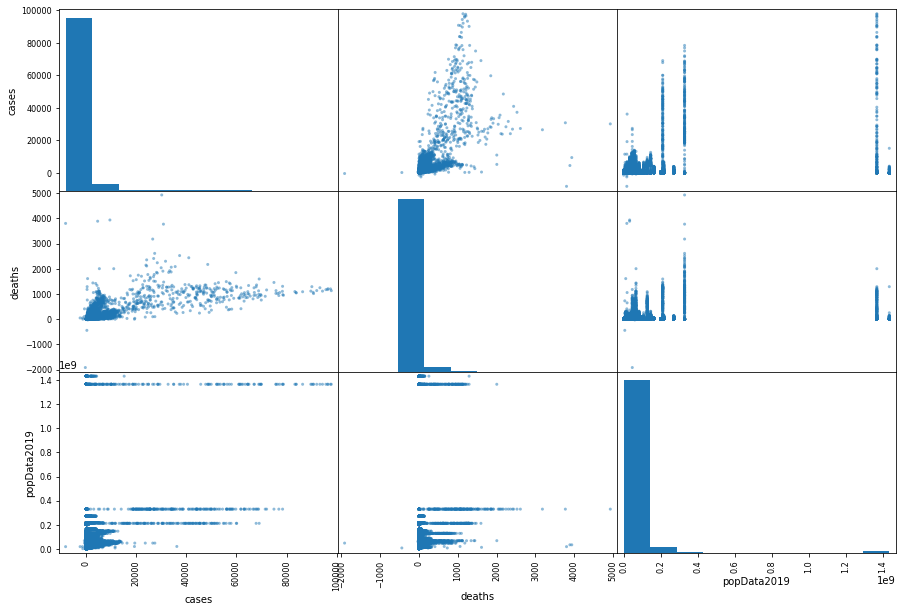

In [79]:
from pandas.plotting import scatter_matrix
attributes = [ "cases", "deaths", "popData2019" ]
scatter_matrix(df[attributes], figsize=(15,10));

In [59]:
covid = df.set_index(["dateRep", "countriesAndTerritories"])

In [60]:
covid.head()

,,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,countriesAndTerritories,,,,,,,,,,
19/09/2020,Afghanistan,19,9,2020,47,1,AF,AFG,38041757.0,Asia,1.616645
18/09/2020,Afghanistan,18,9,2020,0,0,AF,AFG,38041757.0,Asia,1.535155
17/09/2020,Afghanistan,17,9,2020,17,0,AF,AFG,38041757.0,Asia,1.653446
16/09/2020,Afghanistan,16,9,2020,40,10,AF,AFG,38041757.0,Asia,1.708649
15/09/2020,Afghanistan,15,9,2020,99,6,AF,AFG,38041757.0,Asia,1.627159


In [81]:
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649
2020-09-15,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159


In [88]:
df.groupby(["countriesAndTerritories"])["cases"].sum().reset_index()

,countriesAndTerritories,cases
0,Afghanistan,38919
1,Albania,12073
2,Algeria,49413
3,Andorra,1564
4,Angola,3789
5,Anguilla,3
6,Antigua_and_Barbuda,95
7,Argentina,601700
8,Armenia,46910
9,Aruba,3460


In [89]:
countries = df.groupby(["countriesAndTerritories"])["cases"].sum().reset_index()

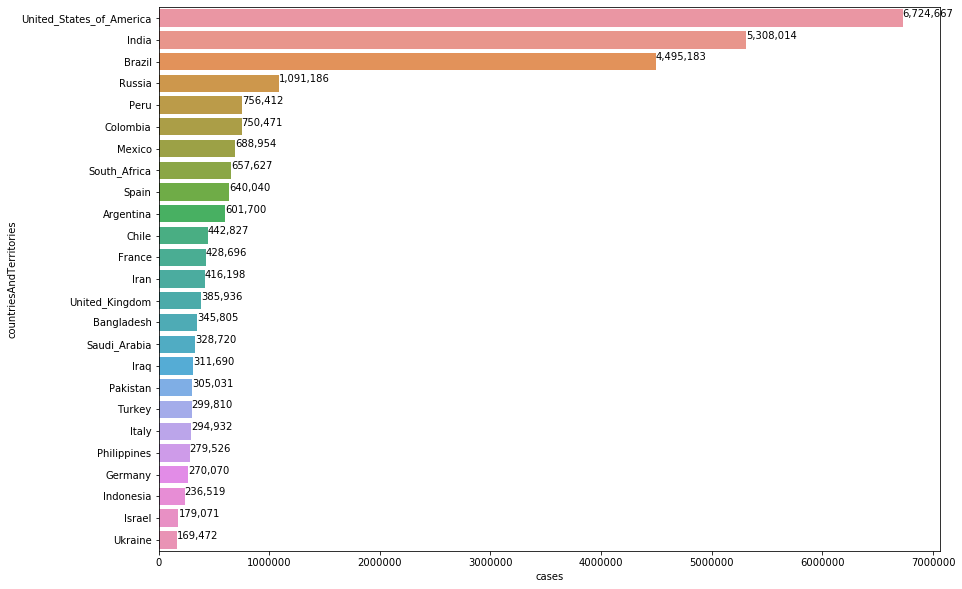

In [97]:
top25 = countries.sort_values(by=["cases"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top25["cases"], top25["countriesAndTerritories"])

for i, (value,name) in enumerate(zip(top25["cases"], top25["countriesAndTerritories"])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()


# https://towardsdatascience.com/covid-19-data-visualization-using-python-3c8bcfaeff5f

## Feature Engineering:

In [36]:
df_new = df.copy()
# Rescale the population to be in terms of millions
df_new["pop_in_millions"] = df_new["popData2019"]/(10**6)
# Calculate the number of Covid cases per every million of pupulation
df_new["cases_per_million"] = df_new["cases"]/df_new["pop_in_millions"]
# Calculate death rates per million
df_new["deaths_per_million"] =  df_new["deaths"] / df_new["pop_in_millions"]
df_new.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,pop_in_millions,cases_per_million,deaths_per_million
0,19/09/2020,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,38.041757,1.235484,0.026287
1,18/09/2020,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,38.041757,0.000000,0.000000
2,17/09/2020,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,38.041757,0.446877,0.000000
3,16/09/2020,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,38.041757,1.051476,0.262869
4,15/09/2020,15,9,2020,99,6,Afghanistan,AF,AFG,38041757.0,Asia,1.627159,38.041757,2.602403,0.157721


### Rescaling Values
Since there is a huge variation in the number of cases per day, I am going to normalize the scores to be between 0 and 1 using Scikit-learn's MinMax Scaler

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [27]:
pop_mil = pop/(10**6)

In [28]:
pop_mil

38.041757

In [29]:
cases_per_day = 40

In [30]:
print(cases_per_day/pop_mil)

1.05147614501612


In [3]:
columns = ['date_reported', 'day', 'month','year','cases','deaths','country/territory','geo_id',
          'pop_data_2019', 'continent','cm_no_14_days']